<h1><center> Tópicos Avançados em Python para Análise de Dados </center></h1>

![](https://drive.google.com/uc?export=view&id=1qCH-jlzKK1aFaTBpiTHN4qxTFrCVs720) 

<center>
<h5>
O objetivo desse material é mostrar a você como aplicar diversos métodos das duas bibliotecas mais famosas para Ciência de Dados: Pandas e Seaborn. Ao longo do curso além de conhecermos como essas ferramentas funcionam vamos praticar a análise em dados reais e transformar os dados que temos em informações. 
Vamos nessa!
<h5>
<center>

## Módulo 4

### Lição 1: Objetivos do módulo

### Lição 2: Conhecendo o Seaborn

Agora que já sabemos uma pouco mais sobre o **Seaborn**, vamos ver como podemos usá-lo. 

Primeiro de tudo, devemos importar as bibliotecas utilizadas em nossos exemplos:

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Apesar de usarmos o **Seaborn** como biblioteca principal de visualização, ela é muito utilizada em conjunto com o **Matplotlib**. Importamos ambas bibliotecas para termos referênciaa para ambas: *sns* e *plt*. 

A ideia principal do **Seaborn** é fornecer uma interface para a criação de gráficos mais robusto e completos com a ajuda do **Matplotlib**.

**Versão da biblioteca**

É importante nos atentarmos à versão do **Seaborn** que temos instalada em nosso computador, pois algumas versões não apresentam alguns métodos ou funções com mesmo nome ou sintaxe. 

Para fazer isso, podemos fazer:

> ```pip show seaborn```

Se quiser saber mais um pouco sobre as diferenças entre as versões veja [aqui](https://seaborn.pydata.org/whatsnew.html)

In [ ]:
pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: pandas, scipy, matplotlib, numpy
Required-by: missingno


Como mostramos, a biblioteca **Seaborn** apresenta diversas opções de paletas de cores. 

Podemos acessá-las como o método **.color_pallete()**, passando a paleta e a quantidade de cores que desejamos.

Além disso, podemos mostrá-las graficamente como o **.palplot()**.

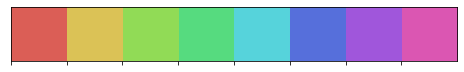

In [ ]:
sns.palplot(sns.color_palette("hls", 8))

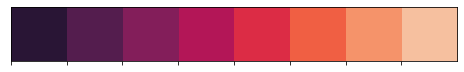

In [ ]:
sns.palplot(sns.color_palette("rocket",8))

Com a função **.color_pallete()** podemos acessar os códigos hexadecimais das cores geradas. 

Podemos usar isso para criar uma lista de cores e usar nos gráficos, ou mesmo para identificar cores de forma mais assertiva.

['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3']


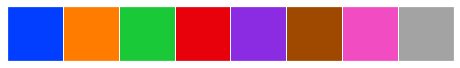

In [ ]:
sns.palplot(sns.color_palette("bright", 8))
colors = sns.color_palette("bright", 8).as_hex()
print(colors)

Por último, a biblioteca também oferece diversos temas que configuram sem muito esforço a estética dos nossos gráficos. 

Podemos utilizá-los com o método **.set_theme('style')** (*versão > 11.X*)

> *p.s.* Para versões <= 10.0 utilize o método **.set(style='style')**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


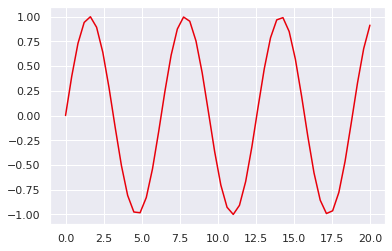

In [ ]:
sns.set(style='darkgrid')   
x = np.linspace(0,20)
y = np.sin(x)
sns.lineplot(x,y, color=colors[3])
plt.show()


### Lição 3: Histogramas, distribuições e KDEs

In [ ]:
dados = pd.read_csv('listings_limpa.csv')

In [ ]:
dados['category'] = pd.cut(dados.price, labels=["baixos", "medios", "altos", "muito alto"], 
                           bins=[0,95, 129, 180, 8000])

**Displot**

O método a nível de figura **.displot()** fornece acesso a várias abordagens para visualizar a distribuição de diversos tipos de dados. 

Com ele podemos criar, por exemplo, histogramas para visualizar como se comportam os dados. 

Se analisarmos o comportamento dos preços vemos a seguinte distribuição:

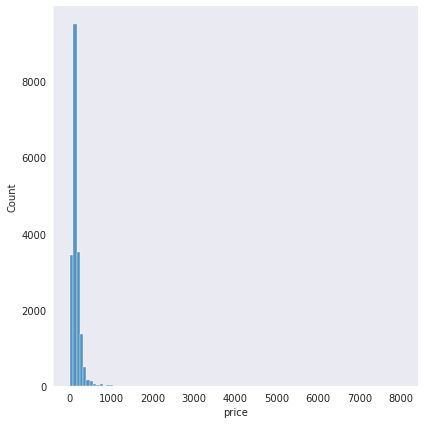

In [ ]:
sns.set_style('dark')
sns.displot(dados.price, height=6, bins=100)

Perceba que temos um intervalo de preços muito grande e a maior parte se concentra no início do intervalo. 

Assim, seria interessante mudar o intervalo dos dados para termos uma noção maior de como se comportam a maior parte dos nossos dados.

**KDE**

Na estatística é muito comum criarmos histogramas juntamente com a **linha de densidade de probabilidade dos dados**. Essa linha pode ser aproximada pelo **KDE (Kernel Density Estimation)**. 

Ela é fundamental para problemas de suavização de dados, onde as inferências sobre a população são feitas com base em uma amostra de dados finitos. Nosso objetivo é ter uma ideia de como seria a distribuição contínua das frequências de nossas observações.

Sabendo disso, podemos responder a seguinte pergunta:

* Qual o intervalo de maior probabilidade entre os preços de um Airbnb?

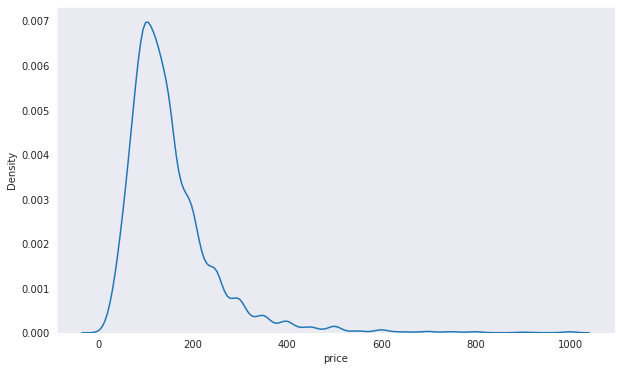

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(dados.price[dados.price <= 1000])

Esses dois tipos de gráficos (Histogramas e KDE) são complementares e uma facilidade apresentada pelo **Seaborn** é plotar os dois em uma única figura apenas mudando os parâmetros do **.displot()**.

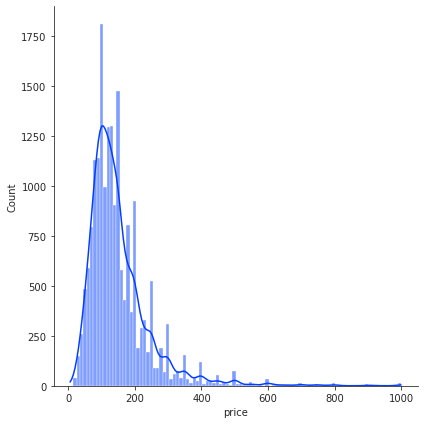

In [ ]:
sns.set_style('ticks')
sns.displot(dados.price[dados.price <=1000], height=6, bins=100, kde=True, color=colors[0])

**Lineplot**

Com o **.lineplot()** podemos gerar gráficos lineares mais robustos do que com o **.plot()** do **Matplotlib**. Com ele podemos responder as seguintes perguntas:

* Qual a tendência do número de *reviews* dos Airbnbs ao longo dos anos?

* Podemos observar o aumento da popularidade desse tipo de serviço? 

In [ ]:
dados['last_review'] = dados.last_review.replace('No review', None)
dados['last_review'] = pd.to_datetime(dados.last_review)

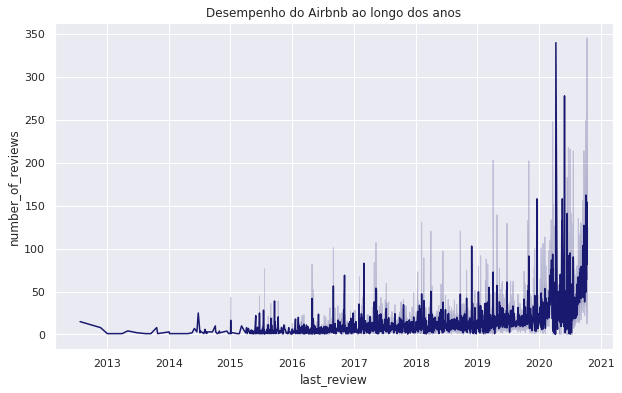

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dados,x='last_review', y='number_of_reviews', 
             color='midnightblue')
plt.title('Desempenho do Airbnb ao longo dos anos')
plt.show()

### Lição 4: Outliers: pontos fora da curva

### Lição 5: Um pouco sobre o Boxplot e Violinplot

### Lição 6: Boxplot, Violinplot e outliers

Como vimos, os *boxplots* e os *violinplots* são muito úteis para visualizarmos informações estatísticas sobre nossos dados, como: média, intervalos interquartil, outliers... 

**Boxplot**

Vamos tentar responder algumas perguntas sobre os nossos dados:

* Como se comportam os preços de cada tipo de quarto da nossa base de dados?

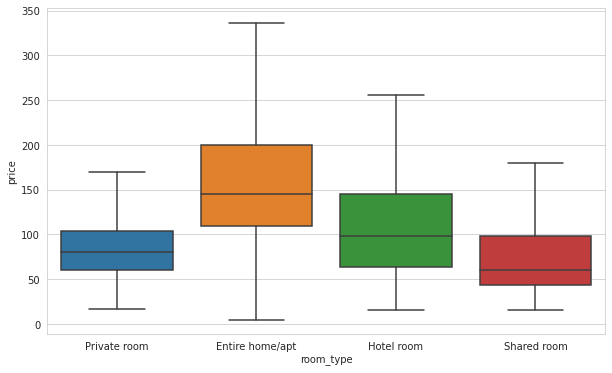

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=dados, showfliers=False) 

Veja que, como o *boxplot* gerado fica achatado graças aos *outliers* presentes na base de dados (Airbnbs com um preço muito alto, por exemplo). 

Se não mostrarmos os pontos fora da curva com a ajuda do parâmetro **showfliers**, vemos que o gráfico mostra que a maior parte dos preços de Airbnb se encontram entre 0 e 400. 

Além disso, conseguimos perceber uma diferença entre as medidas de tendência central de cada tipo de quarto alugado. 

**Outliers**

Nosso interesse pode ser acessar e estudar os outliers retirados da visualização dos gráficos acima.

* Como podemos acessar e separar os *outliers* de nossa base?

-32.5 307.5
min     309
max    8000
Name: price, dtype: int64


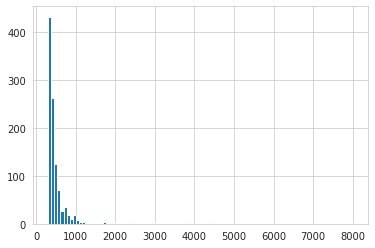

In [ ]:
box = dados.price.describe()

q1 = box['25%']
q3 = box['75%']
IQR = q3 - q1

maximo = q3 + 1.5*IQR 
minimo = q1 - 1.5*IQR 

print(minimo, maximo)
print(dados[(dados.price > maximo) | (dados.price < minimo)].price.
      agg(['min', 'max']))

dados[ (dados.price > maximo) | (dados.price < minimo) ].price.hist(bins=100)

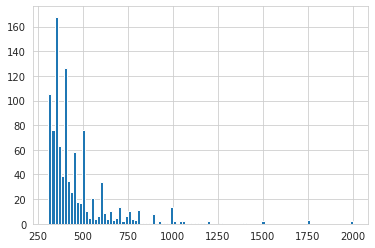

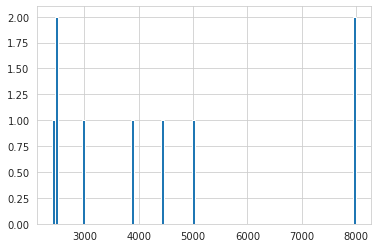

In [ ]:
dados[( (dados.price > maximo) | (dados.price < minimo) ) & 
      (dados.price <= 2000)].price.hist(bins=100)
plt.show()

dados[( (dados.price > maximo) | (dados.price < minimo) ) & 
      (dados.price > 2000)].price.hist(bins=100)
plt.show()

Podemos salvar a nossa base de *outliers* para estudo posteior, caso seja do seu interesse.

In [ ]:
dados[ (dados.price > maximo) | (dados.price < minimo) ].
to_csv("outliers_price.csv")

**Violinplot**  

Para plotarmos o **Violinplot** vamos usar os intervalos interquartis dos preços para vermos como eles se comportam

In [ ]:
dados.price.describe()

count    18782.000000
mean       155.206208
std        147.938192
min          5.000000
25%         95.000000
50%        129.000000
75%        180.000000
max       8000.000000
Name: price, dtype: float64

Com os dados de cada um dos intervalos podemos visualizar, da melhor forma, o comportamento dos preços de acordo com os tipos de quarto.

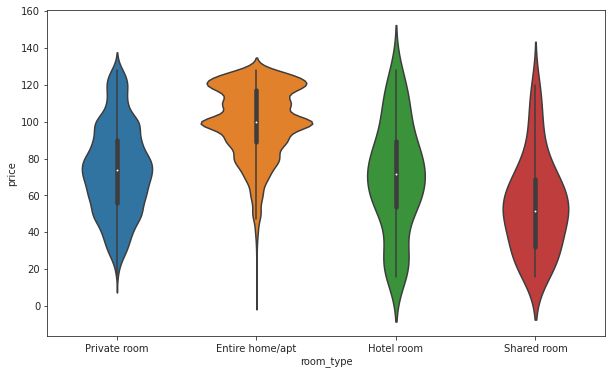

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='room_type', y='price', 
               data= dados[(dados['price'] > 0) & (dados['price'] < 129)])

Podemos ver que, ao contrário do *Boxplot*, o *Violinplot* mostra como as distribuições se comportam de forma contínua. 

Por exemplo, isso é interessante para descobrirmos quais dados são melhor distribuídos e quais são mais concentrados. Ou mesmo para identificar características de tendência central de nossas distribuições.

**Comparação de distribuições de categorias binárias**

Vamos agora focar nosso estudo para comparar distribuições considerando categorias binárias.

Observe a pergunta abaixo:

* Como se comportam os preços dos Airbnbs que apresentam quartos completos (Entire rooms) e os que não apresentam separando-os por categoria de preço (baixo, médio, alto, muito alto)?

Primeiro vamos criar a coluna *complete* que indica se o Airbnb é completo ou não. Para criá-la vamos usar o *apply* visto no módulo anterior

In [ ]:
dados['complete'] = dados['room_type'].apply(lambda x: True 
                                          if x == 'Entire home/apt' else False)

Segundo, para separar os dados de acordo com a categoria *complete* usaremos o parâmetro **hue**

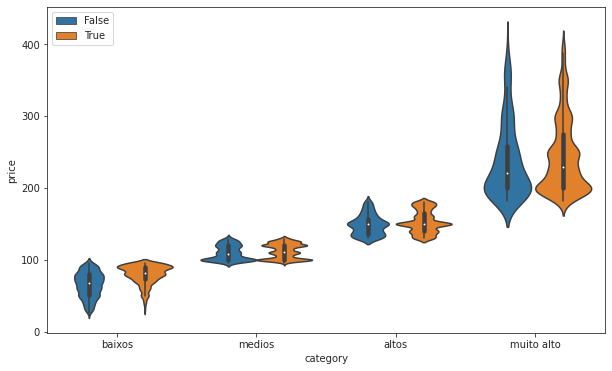

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='category', y='price', data=dados[(dados.price > 25) &
                                            (dados.price < 400)], hue='complete')
plt.legend(loc='upper left')

Veja que podemos ver como se comportam os preços de cada uma das categorias e comparar os Airbnbs completos e não completos. 

Nos hotéis com preços considerados baixos, os completos apresentam preços maiores que os não completos.

Podemos, também, unir as distribuições para fazer essa comparação das tendências lado a lado:

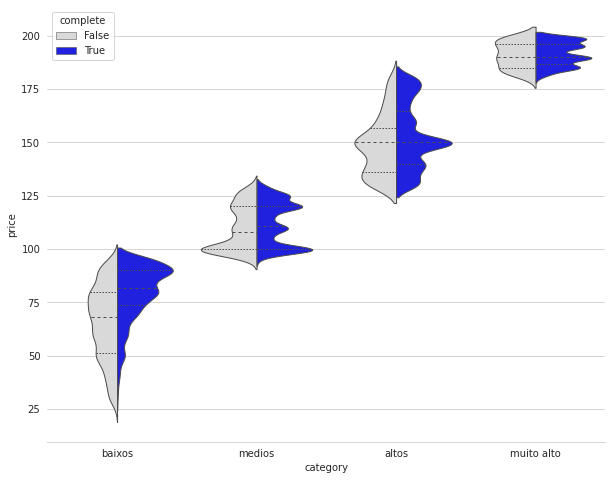

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
sns.violinplot(x='category', y='price', data=dados[(dados.price > 25) & (dados.price < 200)], 
               hue='complete', split=True, inner="quart", 
               linewidth=1, palette={True: "b", False: ".85"})

sns.despine(left=True)

**Orientação dos gráficos** 

Para trabalhar atributos de orientação vamos tentar responder a seguinte pergunta:

* Qual a variação de preço na vizinhança Centrum-West e Gaasperdam - Driemond?

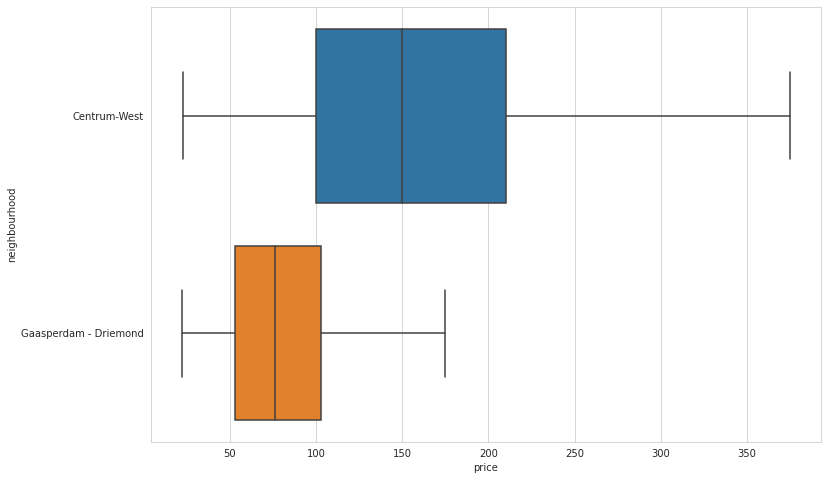

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='price', y='neighbourhood', 
            data=dados[(dados.neighbourhood == 'Centrum-West') | (dados.neighbourhood == 'Gaasperdam - Driemond')],
           showfliers=False, orient="h")

Com a ajuda do parâmetro **orient** conseguimos mudar a orientação do gráfico boxplot para a horizontal, porém é importante comentar que os eixos x e y devem corresponder ao que queremos em cada caso.

 ### Lição 7: Correlação

### Lição 8: Regplot

Para identificar a correlação entre duas variáveis fazemos gráficos de dispersão e, em seguida, traçamos uma linha de tendência dos dados. 

O **Seaborn** apresenta um método para construirmos esse tipo de gráfico: **.regplot()**

O **.regplot()** plota um gráfico com base nos dados e ajusta um modelo linear de acordo com o que foi passado. 

Com a ajuda dele, podemos responder a seguinte pergunta:

* Existe alguma relação entre o preço e a quantidade mínima de noites nos *Airbnbs*?

Podemos responder essa pergunta calculando a covariância e a correlação entre os dados:

In [ ]:
np.cov(dados.price,dados.minimum_nights)

array([[21885.70866068,   100.82081017],
       [  100.82081017,   200.27834826]])

In [ ]:
np.corrcoef(dados.price,dados.minimum_nights)

array([[1.        , 0.04815627],
       [0.04815627, 1.        ]])

Outra alternativa é analisar o gráfico de dispersão procurando algum padrão de correlação:

In [ ]:
teste = dados[(dados.price < 1000) & (dados.minimum_nights < 200) & 
              (dados.neighbourhood == 'Noord-West')]

[]

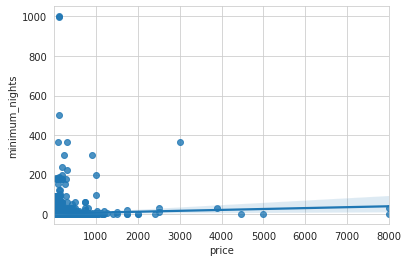

In [ ]:
sns.regplot(x='price', y='minimum_nights', data=dados)
plt.plot()

### Lição 9: Pairplot e Jointplot

**Pairplot**

Esse método vai nos oferecer um gráfico completo com os relacionamentos par a par dos dados numéricos do nosso dataset. 

E por que ele é importante? O bom do **Pairplot** é que ele mostra todos os gráficos dos dados, facilitando visualizar algum tipo de correlação entre os dados. Porém, devemos tomar cuidado com esse tipo de gráfico, pois algumas relações não fazem muito sentido. Por exemplo, os números das colunas ```id``` e ```host_id``` são números de identificação e qualquer relação entre eles e outros dados não faz muito sentido.

Vamos filtrar algumas colunas de interesse:

In [ ]:
data = dados[['neighbourhood','room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month']]

* Vamos visualizar as dispersões de pares dessas variáveis para Airbnbs com preços inferiores a 800 (unidade monetária) na vizinhança 'Gaasperdam - Driemond'. Identifique cada instância pelo tipo de quarto alugado.   

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


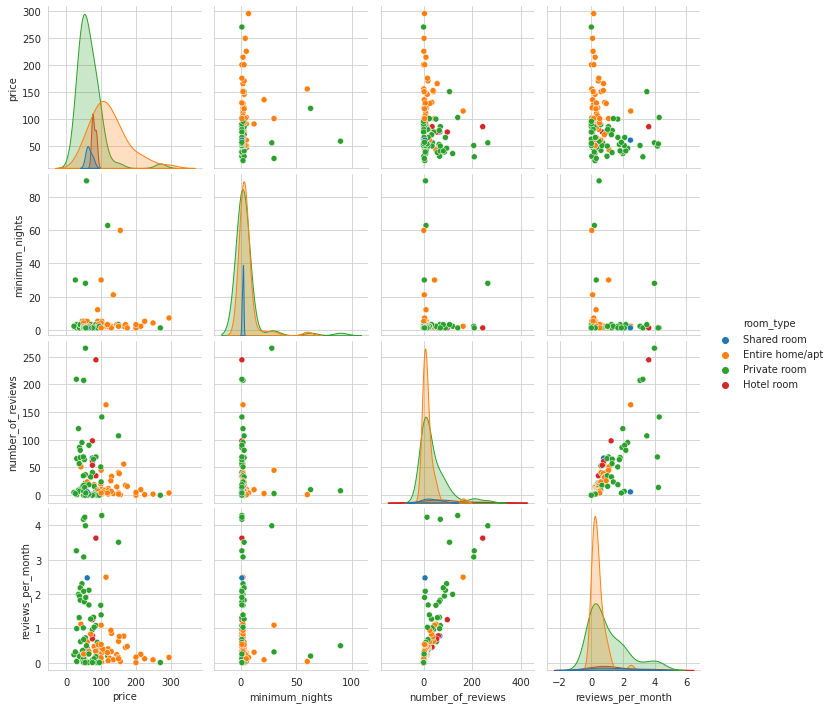

In [ ]:
sns.pairplot(data[ (data.price < 800) & 
                  (data.neighbourhood == 'Gaasperdam - Driemond')  ], hue='room_type')

# (dados.neighbourhood == 'Centrum-West') | (dados.neighbourhood == 'Gaasperdam - Driemond')

É interessante falar que o **.pairplot()** permite escolhermos o gráfico que queremos que fique na diagonal principal do plot, podendo ser uma *kde*, um *histograma*, etc

**Jointplot**

O **.jointplot()** desenha um gráfico de dispersões de duas variáveis. 

Com ele podemos plotar um gráfico de dispersão juntamente com gráficos de histogramas. 

O interessante desse gráfico é que conseguimos manipular os parâmetros para construir o gráfico que melhor se enquadra na nossa análise.

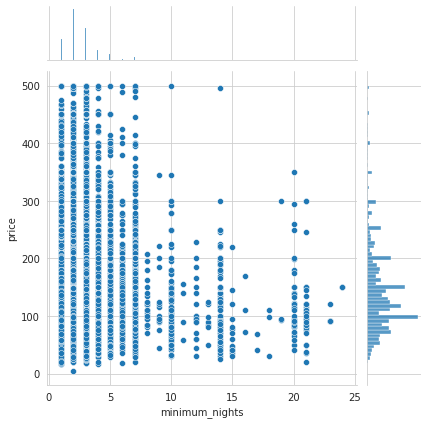

In [ ]:
sns.jointplot(data=data[(data.price <=500) & (data.minimum_nights < 25)], 
              x="minimum_nights", y="price")
plt.show()

O **.jointplot()** apresenta diversos parâmetros que podem ser utilizados da melhor forma para ajudar na sua análise, veja [aqui](http://seaborn.pydata.org/generated/seaborn.jointplot.html#:~:text=Draw%20a%20plot%20of%20two,you%20should%20use%20JointGrid%20directly.)

### Lição 10: Mapa de calor

Os **Mapas de Calor** (Heatmaps) são gráficos que, facilmente, transmitem a informação desejada por meio de escalas de cores. 

A ideia por trás dos gráficos é representar valores numéricos por escalas de cores de fácil identificação.

Por exemplo: com o mapa de calor, conseguiremos ver quais características (features) dos nossos dados apresentam uma correlação mais forte ou mais fraca.

Antes de irmos diretamente para o mapa, precisamos calcular a correlação entre todas as colunas do nosso *DataFrame*. Para isso, o **Pandas** oferece o método **.corr()** que calcula a correlação dos pares de colunas e retorna um *DataFrame* com a matrix de correlação

In [ ]:
dados = dados.drop(columns=['id','host_id'])
correlacao = dados.corr()
correlacao

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,complete
latitude,1.000000,-0.139904,0.002700,-0.012737,0.034805,0.032026,0.013571,0.025710,0.015505
longitude,-0.139904,1.000000,0.006603,0.004442,0.002660,0.004130,-0.000256,0.032163,-0.041451
price,0.002700,0.006603,1.000000,0.048156,-0.087437,-0.102538,0.061936,0.053806,0.209782
minimum_nights,-0.012737,0.004442,0.048156,1.000000,-0.016431,-0.029646,-0.010351,0.051360,0.023832
number_of_reviews,0.034805,0.002660,-0.087437,-0.016431,1.000000,0.709996,-0.023378,0.243622,-0.308707
reviews_per_month,0.032026,0.004130,-0.102538,-0.029646,0.709996,1.000000,-0.000892,0.228525,-0.344075
calculated_host_listings_count,0.013571,-0.000256,0.061936,-0.010351,-0.023378,-0.000892,1.000000,0.003675,0.009452
availability_365,0.025710,0.032163,0.053806,0.051360,0.243622,0.228525,0.003675,1.000000,-0.218021
complete,0.015505,-0.041451,0.209782,0.023832,-0.308707,-0.344075,0.009452,-0.218021,1.000000


Agora que temos nossa matriz de correlação, vamos criar nosso heatmap. 

Para isso, o **Seaborn** oferece o método **.heatmap()**. Nele passaremos como parâmetro o *DataFrame* com as correlações.

A vantagem do heatmap é que podemos ajustar alguns dos parâmetros para melhor visualizarmos as informações nele contidas:


 * annot - Escreve os dados em cada célula 
 * cmap - Determina a paleta de cores a ser mostrada no gráfico
 * vmin e vmax - Determina o intervalo de correlação dos dados (-1 até 1)
 
 Além desses, o mapa de calor possui outros parâmetros que podem ser mudados, verifique na [documentação oficial](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 1.0, 'Mapa de Calor')

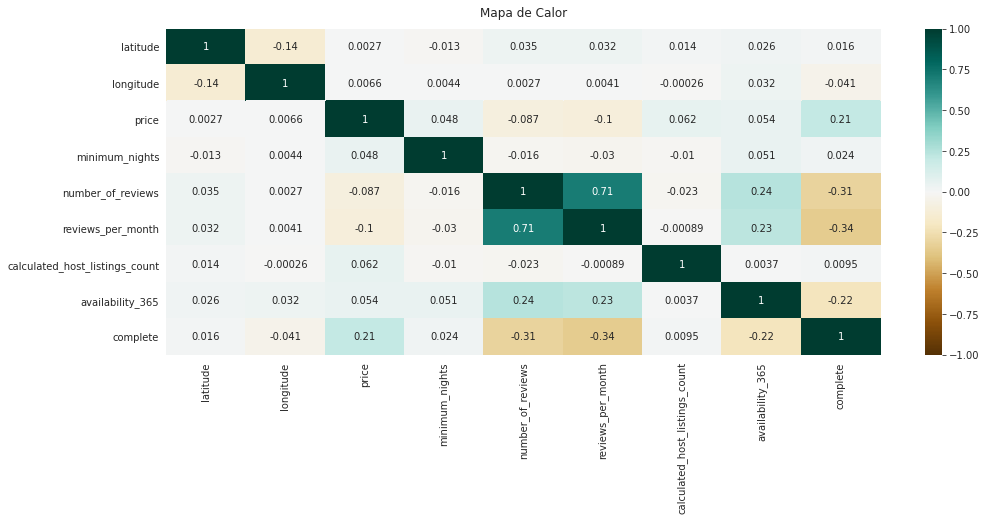

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(correlacao, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Mapa de Calor', fontdict={'fontsize':12}, pad=12)


Analisando o mapa de calor, podemos perceber que há uma correlação maior entre o número total de reviews e a quantidade de reviews por mês de cada um dos Airbnbs. É uma correlação esperada, já que o número total é a soma dos reviews por mês.

O mapa de calor servirá para nos guiar na construção de um melhor modelo de regressão, já que ele nos informa quais colunas apresentam maior semelhança.

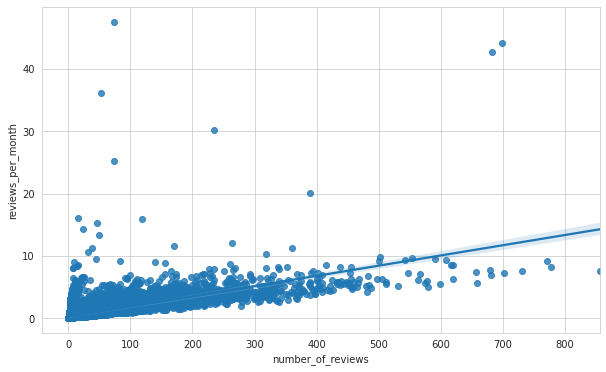

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='number_of_reviews', y='reviews_per_month', data=dados, 
            x_jitter=.03)